# Imports and Data

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [223]:
data100_10mV_20dB = np.load("data100_10mV_20dB.npz")['data'][0]
data200_10mV_10dB = np.load("data200_10mV_10dB.npz")['data'][0]
data300_10mV_10dB = np.load("data300_10mV_10dB.npz")['data'][0]
data400_10mV_10dB = np.load("data400_10mV_10dB.npz")['data'][0]

# 5: Digitally Sampling a Sine Wave

## 5.2: Digital Sampling and the Nyquest Criterion

Direct Sampling Plots:

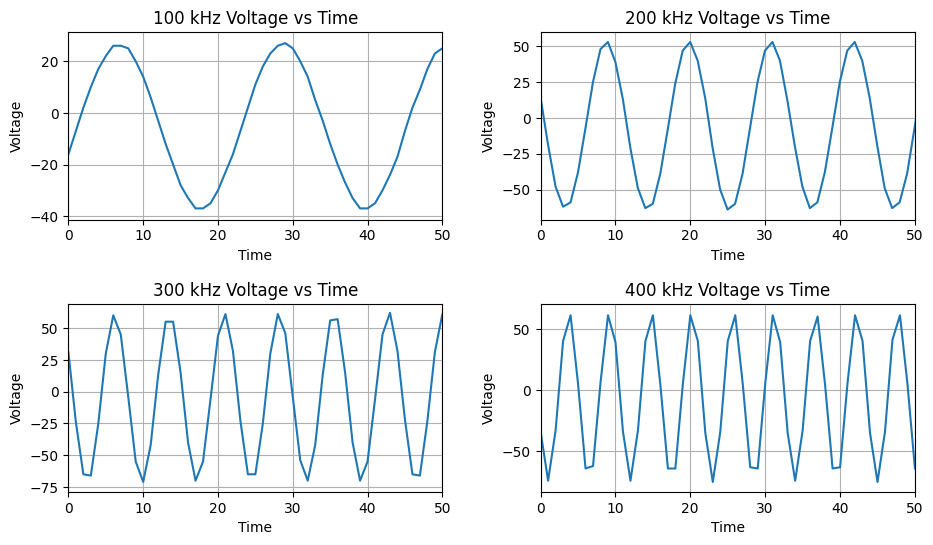

In [224]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

x = np.linspace(0, len(data100_10mV_20dB) + 1, len(data100_10mV_20dB))

ax1.plot(data100_10mV_20dB)
ax1.set_title('100 kHz Voltage vs Time')
ax1.grid('on')
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage')
ax1.set_xlim(0, 50)

ax2.plot(data200_10mV_10dB)
ax2.set_title('200 kHz Voltage vs Time')
ax2.grid('on')
ax2.set_xlabel('Time')
ax2.set_ylabel('Voltage')
ax2.set_xlim(0, 50)

ax3.plot(data300_10mV_10dB)
ax3.set_title('300 kHz Voltage vs Time')
ax3.grid('on')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage')
ax3.set_xlim(0, 50)

ax4.plot(x, data400_10mV_10dB)
ax4.set_title('400 kHz Voltage vs Time')
ax4.grid('on')
ax4.set_xlabel('Time')
ax4.set_ylabel('Voltage')
ax4.set_xlim(0, 50);

Voltage Time Spectrum (Fourier Transforms of Direct Samples):

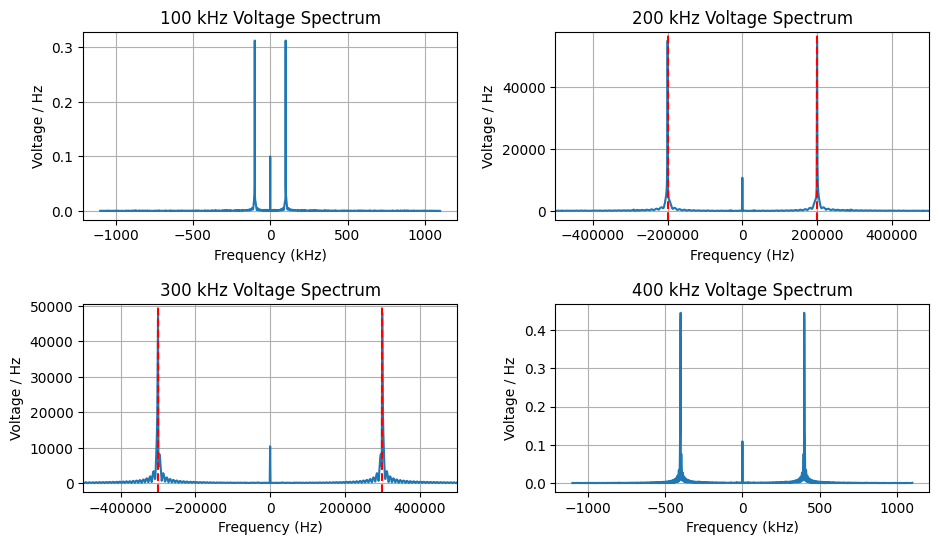

In [225]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

#Cleaning up: variables to use
sampling_rate = 2200000 #hz
f_100khz = 100000 #hz
f_200khz = 200000 #hz
f_300khz = 300000 #hz
f_400khz = 400000 #hz

#Fourier Transforms of the sampled data:
fft_100khz = np.fft.fft(data100_10mV_20dB)
fft_200khz = np.fft.fft(data200_10mV_10dB)
fft_300khz = np.fft.fft(data300_10mV_10dB)
fft_400khz = np.fft.fft(data400_10mV_10dB)

#Frequency of the Sampled Data (Same for all four frequencies):
freq = np.fft.fftfreq(data100_10mV_20dB.size, 1/sampling_rate)

#Plotting:
ax1.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(np.abs(fft_100khz)) / 1e5)
ax1.set_title('100 kHz Voltage Spectrum')
ax1.set_xlabel('Frequency (kHz)')
ax1.set_ylabel('Voltage / Hz')
ax1.grid('on')

ax2.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(fft_200khz)))
ax2.set_title('200 kHz Voltage Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Voltage / Hz')
ax2.set_xlim(-0.5e6, 0.5e6)
ax2.axvline(x=2e5, color="r", linestyle="dashed")
ax2.axvline(x=-2e5, color="r", linestyle="dashed")
ax2.grid('on')

ax3.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(fft_300khz)))
ax3.set_title('300 kHz Voltage Spectrum')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Voltage / Hz')
ax3.set_xlim(-0.5e6, 0.5e6)
ax3.axvline(x=3e5, color="r", linestyle="dashed")
ax3.axvline(x=-3e5, color="r", linestyle="dashed")
ax3.grid('on')

ax4.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(np.abs(fft_400khz)) / 1e5)
ax4.set_title('400 kHz Voltage Spectrum')
ax4.set_xlabel('Frequency (kHz)')
ax4.set_ylabel('Voltage / Hz')
ax4.grid('on')

Power Spectrum (abs(Fourier Transforms)**2)

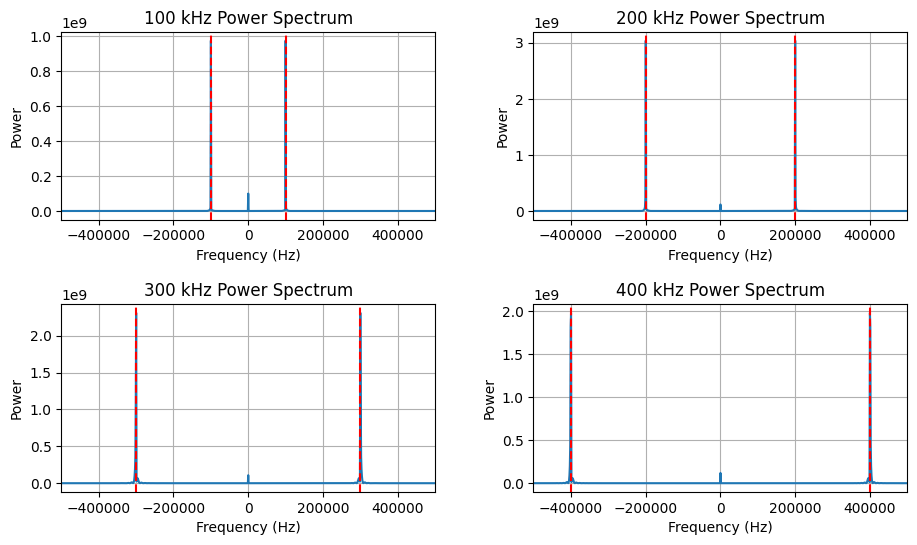

In [226]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

#Power of the Sampled Data:
power_100khz = np.abs(fft_100khz)**2
power_200khz = np.abs(fft_200khz)**2
power_300khz = np.abs(fft_300khz)**2
power_400khz = np.abs(fft_400khz)**2

ax1.plot(np.fft.fftshift(freq), np.fft.fftshift(power_100khz))
ax1.set_title('100 kHz Power Spectrum')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power')
ax1.set_xlim(-0.5e6, 0.5e6)
ax1.axvline(x=1e5, color="r", linestyle="dashed")
ax1.axvline(x=-1e5, color="r", linestyle="dashed")
ax1.grid('on')

ax2.plot(np.fft.fftshift(freq), np.fft.fftshift(power_200khz))
ax2.set_title('200 kHz Power Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power')
ax2.set_xlim(-0.5e6, 0.5e6)
ax2.axvline(x=2e5, color="r", linestyle="dashed")
ax2.axvline(x=-2e5, color="r", linestyle="dashed")
ax2.grid('on')

ax3.plot(np.fft.fftshift(freq), np.fft.fftshift(power_300khz))
ax3.set_title('300 kHz Power Spectrum')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Power')
ax3.set_xlim(-0.5e6, 0.5e6)
ax3.axvline(x=3e5, color="r", linestyle="dashed")
ax3.axvline(x=-3e5, color="r", linestyle="dashed")
ax3.grid('on')

ax4.plot(np.fft.fftshift(freq), np.fft.fftshift(power_400khz))
ax4.set_title('400 kHz Power Spectrum')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Power')
ax4.set_xlim(-0.5e6, 0.5e6)
ax4.axvline(x=4e5, color="r", linestyle="dashed")
ax4.axvline(x=-4e5, color="r", linestyle="dashed")
ax4.grid('on')

## 5.3: Voltage Spectra and Power Spectra:

Real and Imaginary Components of the Voltage Spectrum:

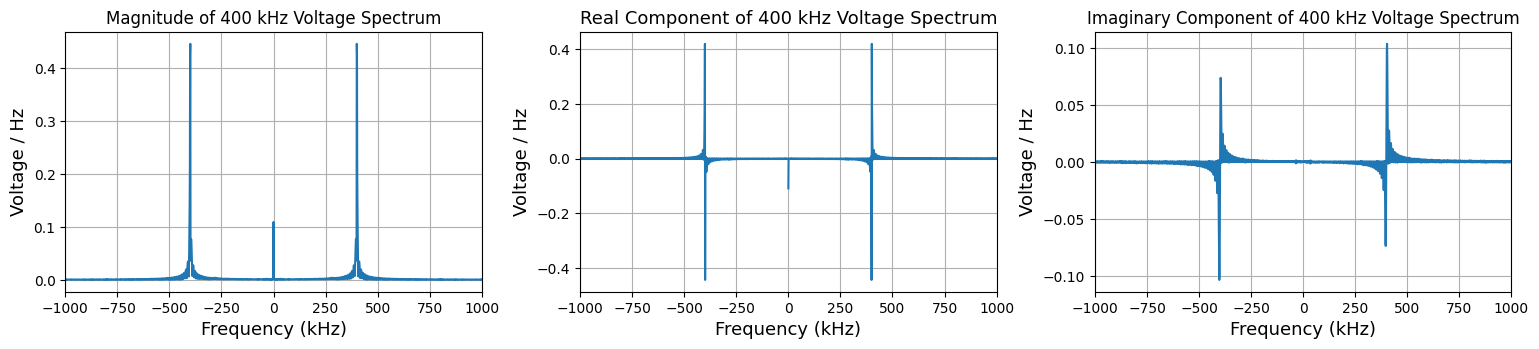

In [227]:
#for report
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,4))
plt.tight_layout(pad=4)


ax1.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(np.abs(fft_400khz)) / 1e5)
ax1.set_title('Magnitude of 400 kHz Voltage Spectrum')
ax1.set_xlabel('Frequency (kHz)', fontsize=13)
ax1.set_ylabel('Voltage / Hz', fontsize=13)
ax1.set_xlim(-1000, 1000)
ax1.grid('on')

ax2.plot(freq / 1e3, fft_400khz.real / 1e5)
ax2.set_title('Real Component of 400 kHz Voltage Spectrum', fontsize=13)
ax2.set_xlabel('Frequency (kHz)', fontsize=13)
ax2.set_ylabel('Voltage / Hz', fontsize=13)
ax2.set_xlim(-1000, 1000)
ax2.grid('on')

ax3.plot(freq / 1e3, fft_400khz.imag / 1e5)
ax3.set_title('Imaginary Component of 400 kHz Voltage Spectrum', fontsize=12)
ax3.set_xlabel('Frequency (kHz)', fontsize=13)
ax3.set_ylabel('Voltage / Hz', fontsize=13)
ax3.set_xlim(-1000, 1000)
ax3.grid('on')

Inverse Fourier Transform of Power Spectrum

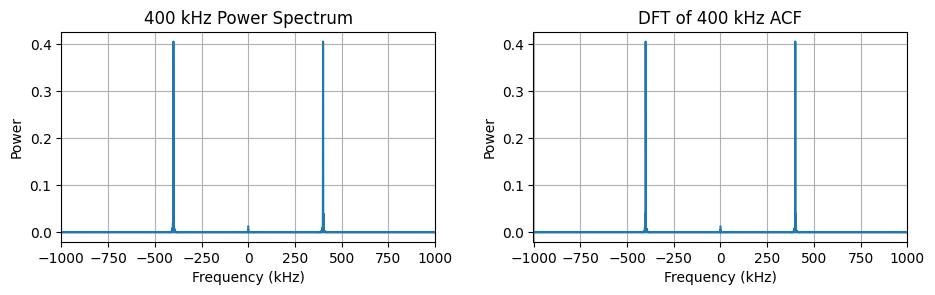

In [228]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
plt.tight_layout(pad=4)

data100_10mV_20dB_pad = np.concatenate((data100_10mV_20dB, np.zeros(len(data100_10mV_20dB)-1)))
data200_10mV_10dB_pad = np.concatenate((data200_10mV_10dB, np.zeros(len(data100_10mV_20dB)-1)))
data300_10mV_10dB_pad = np.concatenate((data300_10mV_10dB, np.zeros(len(data100_10mV_20dB)-1)))
data400_10mV_10dB_pad = np.concatenate((data400_10mV_10dB, np.zeros(len(data100_10mV_20dB)-1)))

power_100khz = np.abs(np.fft.fft(data100_10mV_20dB_pad))**2
power_200khz = np.abs(np.fft.fft(data200_10mV_10dB_pad))**2
power_300khz = np.abs(np.fft.fft(data300_10mV_10dB_pad))**2
power_400khz = np.abs(np.fft.fft(data400_10mV_10dB_pad))**2

ac_100khz = np.correlate(data100_10mV_20dB_pad, data100_10mV_20dB_pad, mode='same')
ac_200khz = np.correlate(data200_10mV_10dB_pad, data200_10mV_10dB_pad, mode='same')
ac_300khz = np.correlate(data300_10mV_10dB_pad, data300_10mV_10dB_pad, mode='same')
ac_400khz = np.correlate(data400_10mV_10dB_pad, data400_10mV_10dB_pad, mode='same')

fft_ac100 = np.abs(np.fft.fft(ac_100khz))
fft_ac200 = np.abs(np.fft.fft(ac_200khz))
fft_ac300 = np.abs(np.fft.fft(ac_300khz))
fft_ac400 = np.abs(np.fft.fft(ac_400khz))

freq_corr = np.fft.fftfreq(fft_ac400.size, 1/sampling_rate)
freq_power = np.fft.fftfreq(power_400khz.size, 1/sampling_rate)

ax1.plot(freq_power / 1e3, power_400khz / 1e10)
ax1.set_title('400 kHz Power Spectrum')
ax1.set_xlabel('Frequency (kHz)')
ax1.set_ylabel('Power')
ax1.set_xlim(-1000, 1000)
ax1.grid('on')

ax2.plot(freq_corr / 1e3, fft_ac400 / 1e10)
ax2.set_title('DFT of 400 kHz ACF')
ax2.set_xlabel('Frequency (kHz)')
ax2.set_ylabel('Power')
ax2.set_xlim(-1000, 1000)
ax2.grid('on')

Autocorrelation Function of of Voltage Time Series

## 5.4: Leakage Power

Spectral Leakage:

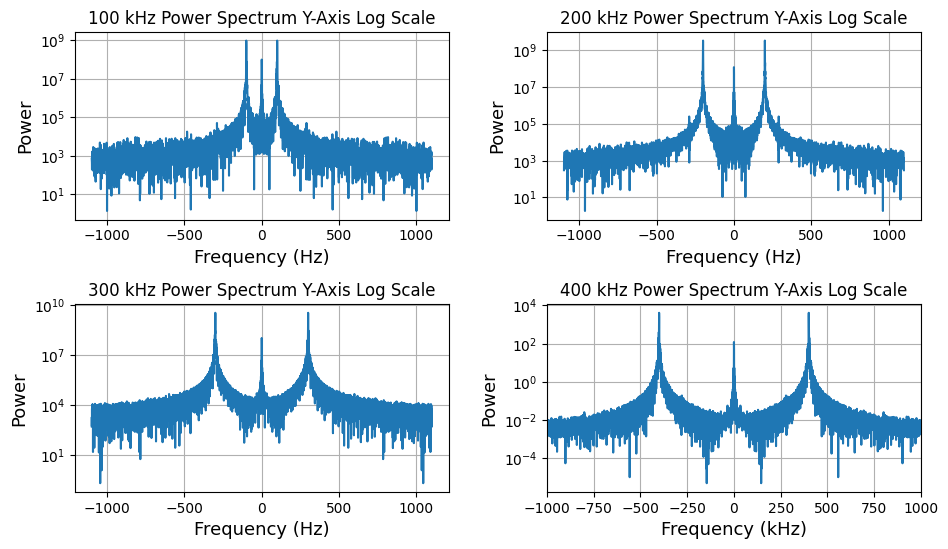

In [229]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

freq = np.fft.fftfreq(power_100khz.size, 1/2.2e6)

ax1.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_100khz))
ax1.set_title('100 kHz Power Spectrum Y-Axis Log Scale')
ax1.set_xlabel('Frequency (Hz)', fontsize=13)
ax1.set_ylabel('Power', fontsize=13)
ax1.grid('on')

ax2.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_200khz))
ax2.set_title('200 kHz Power Spectrum Y-Axis Log Scale')
ax2.set_xlabel('Frequency (Hz)', fontsize=13)
ax2.set_ylabel('Power', fontsize=13)
ax2.grid('on')

ax3.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_300khz))
ax3.set_title('300 kHz Power Spectrum Y-Axis Log Scale')
ax3.set_xlabel('Frequency (Hz)', fontsize=13)
ax3.set_ylabel('Power', fontsize=13)
ax3.grid('on')

#for report
ax4.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_400khz) / 1e6)
ax4.set_title('400 kHz Power Spectrum Y-Axis Log Scale')
ax4.set_xlabel('Frequency (kHz)', fontsize=13)
ax4.set_ylabel('Power', fontsize=13)
ax4.set_xlim(-1000, 1000)
ax4.grid('on')

## 5.5: Frequency Resolution:

In [230]:
fr_1000_992 = np.load('c_1000_992.npz')['data'][0]
fr_1000_993 = np.load('c_1000_993.npz')['data'][0]
fr_1000_995 = np.load('c_1000_995.npz')['data'][0]

fft_992 = np.fft.fft(fr_1000_992)
fft_992_half = np.fft.fft(fr_1000_992_half)
fft_993 = np.fft.fft(fr_1000_993)
fft_995 = np.fft.fft(fr_1000_995)

sampling_rate = 2.2e6

freq = np.fft.fftfreq(fft_992.size, d=1/sampling_rate)
freq_half = np.fft.fftfreq(fft_992_half.size, d=2/sampling_rate)

power_992 = np.abs(fft_992)**2
power_992_half = np.abs(fft_992_half)**2
power_993 = np.abs(fft_993)**2
power_995 = np.abs(fft_995)**2

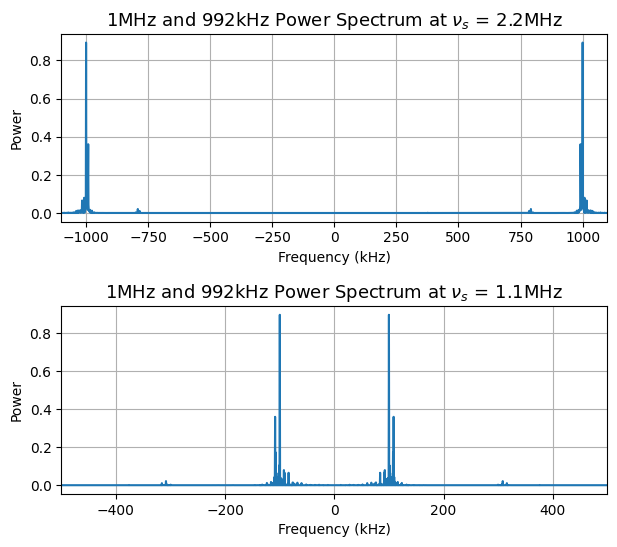

In [231]:
#for report
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))
plt.tight_layout(pad=4)

ax1.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_992) / 1e10)
ax1.set_title(r'1MHz and 992kHz Power Spectrum at $\nu_s$ = 2.2MHz', fontsize=13)
ax1.set_xlabel('Frequency (kHz)')
ax1.set_ylabel('Power')
ax1.set_xlim(-1100, 1100)
ax1.grid('on')

ax2.plot(np.fft.fftshift(freq_half) / 1e3, np.fft.fftshift(power_992_half) / 1e10)
ax2.set_title(r'1MHz and 992kHz Power Spectrum at $\nu_s$ = 1.1MHz', fontsize=13)
ax2.set_xlabel('Frequency (kHz)')
ax2.set_ylabel('Power')
ax2.set_xlim(-500, 500)
ax2.grid('on')

## 5.6: Power Spectra in other Nyquist Zones

Different Nyquist Windows (W= 4, 6, 8, 10)

(0.0, 50.0)

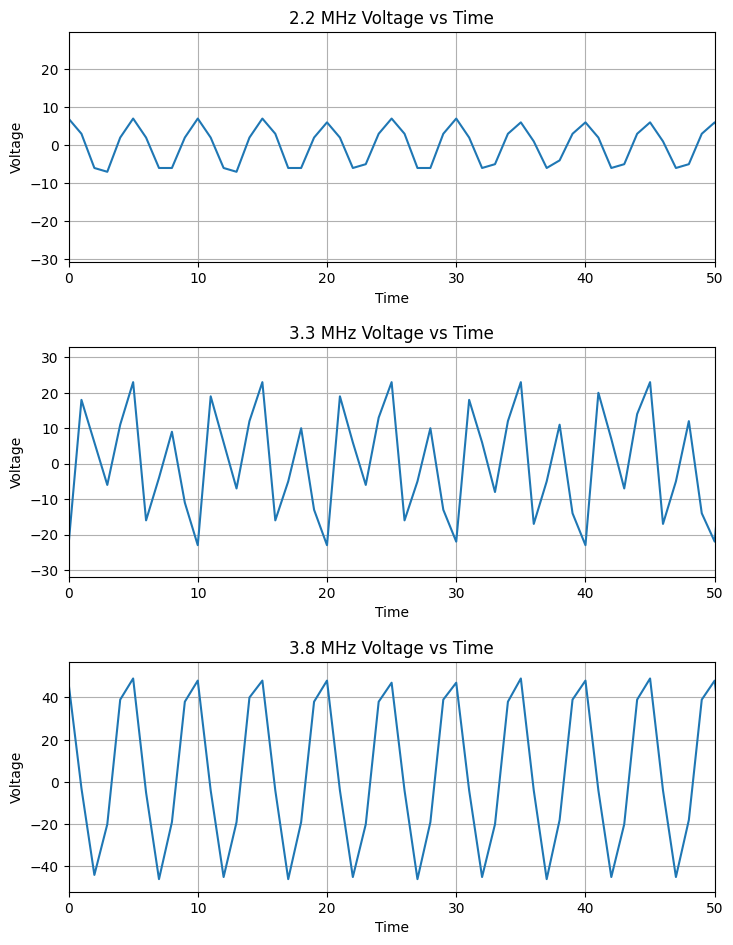

In [232]:
W_4_4 = np.load("w_4_4.npz")['data'][0]
W_6_6 = np.load("w_6_6.npz")['data'][0]
W_7_6 = np.load("w_7_6.npz")['data'][0]

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(8,10))
plt.tight_layout(pad=4)

ax1.plot(W_4_4)
ax1.set_title('2.2 MHz Voltage vs Time')
ax1.grid('on')
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage')

ax1.set_xlim(0, 50)

ax2.plot(W_6_6)
ax2.set_title('3.3 MHz Voltage vs Time')
ax2.grid('on')
ax2.set_xlabel('Time')
ax2.set_ylabel('Voltage')
ax2.set_xlim(0, 50)

ax3.plot(W_7_6)
ax3.set_title('3.8 MHz Voltage vs Time')
ax3.grid('on')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage')
ax3.set_xlim(0, 50)

Power Spectrum of different Nyquist Zones:

(-400.0, 400.0)

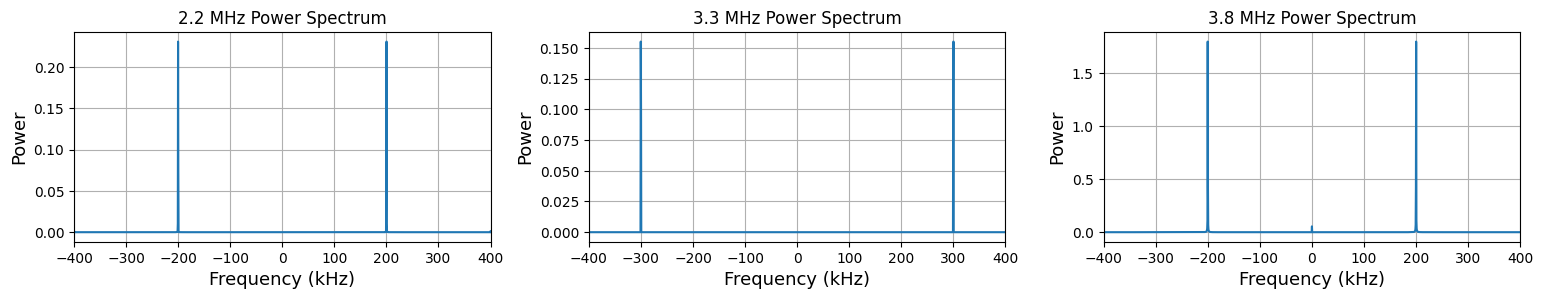

In [243]:
sampling_rate_W = 1000000

fft_W_4_4 = np.fft.fft(W_4_4)
fft_W_6_6 = np.fft.fft(W_6_6)
fft_W_7_6 = np.fft.fft(W_7_6)

power_W_4_4 = np.abs(fft_W_4_4)**2
power_W_6_6 = np.abs(fft_W_6_6)**2
power_W_7_6 = np.abs(fft_W_7_6)**2

power_W_6_6[power_W_6_6 < 1e8] = 0

freq_W = np.fft.fftfreq(fft_W_4_4.size, 1/sampling_rate_W)

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,3.5))
plt.tight_layout(pad=4)

ax1.plot(np.fft.fftshift(freq_W) / 1e3, np.fft.fftshift(power_W_4_4) / 1e9)
ax1.set_title('2.2 MHz Power Spectrum')
ax1.grid('on')
ax1.set_xlabel('Frequency (kHz)', fontsize=13)
ax1.set_ylabel('Power', fontsize=13)
ax1.set_xlim(-400, 400)

ax2.plot(np.fft.fftshift(freq_W) / 1e3, np.fft.fftshift(power_W_6_6) / 1e9)
ax2.set_title('3.3 MHz Power Spectrum')
ax2.grid('on')
ax2.set_xlabel('Frequency (kHz)', fontsize=13)
ax2.set_ylabel('Power', fontsize=13)
ax2.set_xlim(-400, 400)

ax3.plot(np.fft.fftshift(freq_W) / 1e3, np.fft.fftshift(power_W_7_6) / 1e9)
ax3.set_title('3.8 MHz Power Spectrum')
ax3.grid('on')
ax3.set_xlabel('Frequency (kHz)', fontsize=13)
ax3.set_ylabel('Power', fontsize=13)
ax3.set_xlim(-400, 400)

## 5.7: Fourier Transforms of Noise

Histogram of Sampled Voltages:

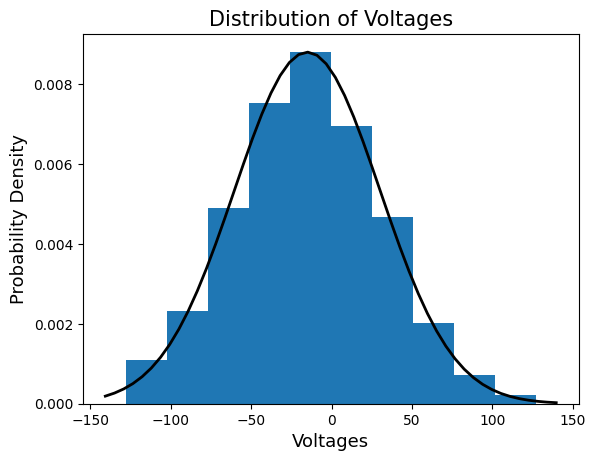

In [234]:
#for report
ng1 = np.load("ng1.npz")
ng2 = np.load('ng2.npz')
sampling_rate = 2.2e6

nblocks = 16
block_size = 2048
ng1_data = np.array([])

for i in range(nblocks):
  ng1_data = np.append(ng1_data, ng1['data'][i])

mu, std = scipy.stats.norm.fit(ng1_data)

plt.hist(ng1_data, density=True)

xmin,xmax = plt.xlim()
x=np.linspace(xmin, xmax)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribution of Voltages', fontsize=15)
plt.xlabel('Voltages', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

plt.show()

Power Spectrum of Each Block:

In [235]:
fft_data = np.array([])

for i in range(0, ng1_data.size, block_size):
  fft_data = np.append(fft_data, np.fft.fft(ng1_data[i:i+block_size]))

freq_ng = np.fft.fftfreq(block_size, d=1/sampling_rate)

In [236]:
power_data = np.abs(fft_data)**2

In [237]:
def power_mean_calc(power, n):
    return np.mean([power_data[i:i+block_size] for i in range(0, power_data.size, block_size)][:n], axis=0)

In [238]:
power_mean_2 = power_mean_calc(power_data, 2)
power_mean_4 = power_mean_calc(power_data, 4)
power_mean_8 = power_mean_calc(power_data, 8)
power_mean_16 = power_mean_calc(power_data, 16)

Text(510.4494949494949, 0.5, 'Power')

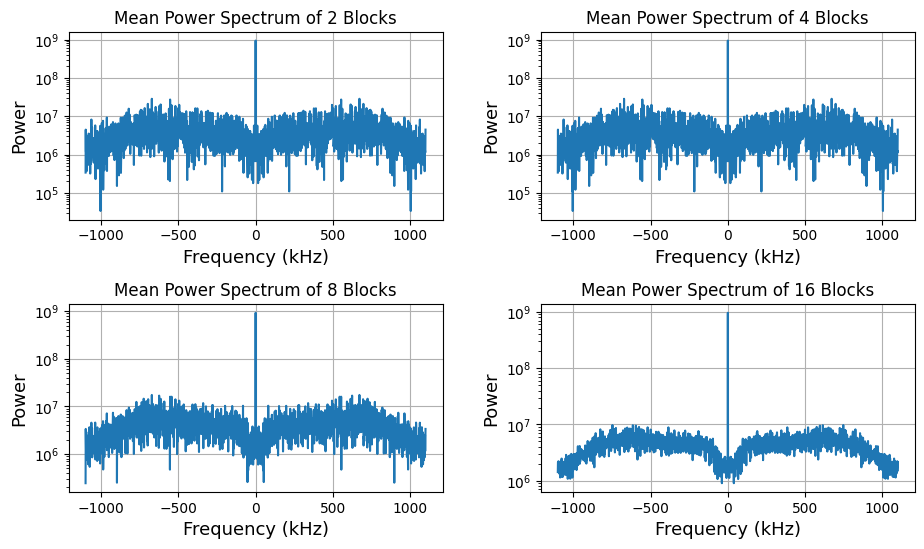

In [239]:
#for report
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

ax1.semilogy(np.fft.fftshift(freq_ng) / 1e3, np.fft.fftshift(power_mean_2))
ax1.set_title('Mean Power Spectrum of 2 Blocks')
ax1.grid('on')
ax1.set_xlabel('Frequency (kHz)', fontsize=13)
ax1.set_ylabel('Power', fontsize=13)

ax2.semilogy(np.fft.fftshift(freq_ng) / 1e3, np.fft.fftshift(power_mean_2))
ax2.set_title('Mean Power Spectrum of 4 Blocks')
ax2.grid('on')
ax2.set_xlabel('Frequency (kHz)', fontsize=13)
ax2.set_ylabel('Power', fontsize=13)

ax3.semilogy(np.fft.fftshift(freq_ng) / 1e3, np.fft.fftshift(power_mean_4))
ax3.set_title('Mean Power Spectrum of 8 Blocks')
ax3.grid('on')
ax3.set_xlabel('Frequency (kHz)', fontsize=13)
ax3.set_ylabel('Power', fontsize=13)

ax4.semilogy(np.fft.fftshift(freq_ng) /1e3, np.fft.fftshift(power_mean_16))
ax4.set_title('Mean Power Spectrum of 16 Blocks')
ax4.grid('on')
ax4.set_xlabel('Frequency (kHz)', fontsize=13)
ax4.set_ylabel('Power', fontsize=13)

# 7.1: The Double-SideBand (DSB) Mixer
# 7.2: Intermodulation Products

Waveform of Mixer Data:

(0.0, 50.0)

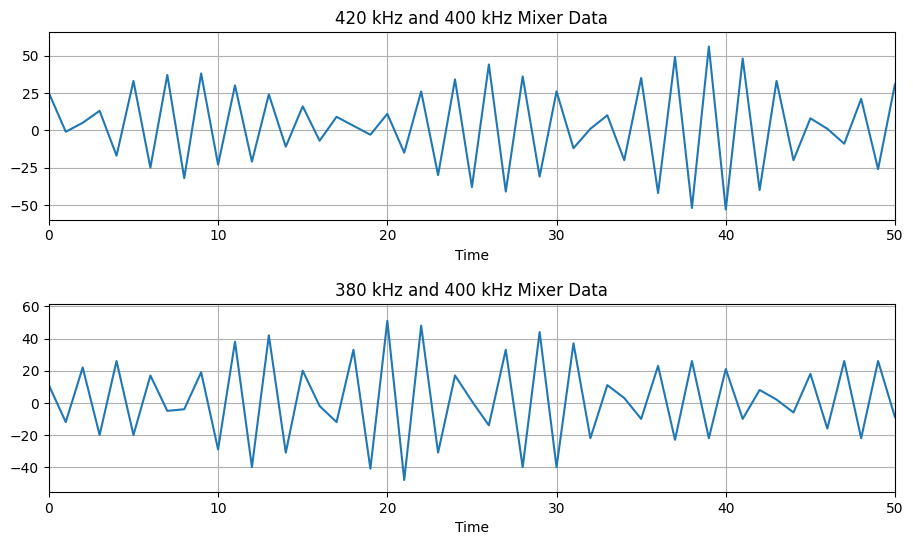

In [240]:
mixer_525_500 = np.load("500hkz_525khz.npz")['data'][0]
mixer_475_500 = np.load("dif_475hkz_500khz.npz")['data'][0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout(pad=4)

ax1.plot(mixer_525_500)
ax1.set_title('420 kHz and 400 kHz Mixer Data')
ax1.set_xlabel('Time')
ax1.grid('on')
ax1.set_xlim(0, 50)

ax2.plot(mixer_475_500)
ax2.set_title('380 kHz and 400 kHz Mixer Data')
ax2.set_xlabel('Time')
ax2.grid('on')
ax2.set_xlim(0, 50)

Fourier Transfomrs of Mixer Data:

Text(0.5, 1.0, 'DSB Mixer: $\\nu_{RF}$ = 475 kHz   $\\nu_{LO}$ = 500 kHz Log Axis')

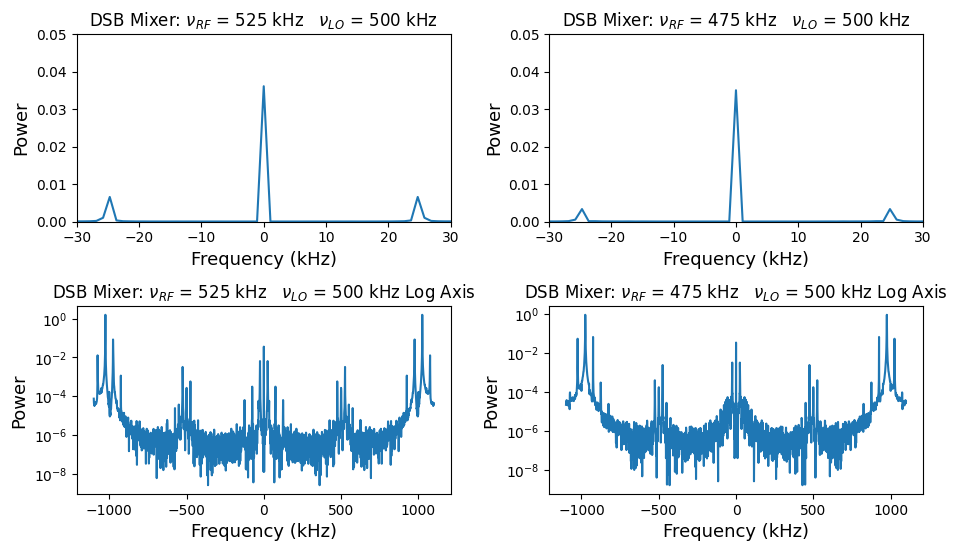

In [241]:
fft_sum = np.fft.fft(mixer_525_500)
fft_diff = np.fft.fft(mixer_475_500)

sampling_rate = 2.2e6

freq = np.fft.fftfreq(fft_sum.size, d=1/sampling_rate)

power_sum = np.abs(fft_sum)**2
power_diff = np.abs(fft_diff)**2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

ax1.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_sum) / 1e9)
ax1.set_xlabel("Frequency (kHz)", fontsize=13)
ax1.set_ylabel("Power", fontsize=13)
ax1.set_title(r"DSB Mixer: $\nu_{RF}$ = 525 kHz   $\nu_{LO}$ = 500 kHz")
ax1.set_xlim(-30, 30)
ax1.set_ylim(0, 0.05)


ax2.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_diff) / 1e9)
ax2.set_xlabel("Frequency (kHz)", fontsize=13)
ax2.set_ylabel("Power", fontsize=13)
ax2.set_title(r"DSB Mixer: $\nu_{RF}$ = 475 kHz   $\nu_{LO}$ = 500 kHz")
ax2.set_xlim(-30, 30)
ax2.set_ylim(0, 0.05)

ax3.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_sum) / 1e9)
ax3.set_xlabel("Frequency (kHz)", fontsize=13)
ax3.set_ylabel("Power", fontsize=13)
ax3.set_title(r"DSB Mixer: $\nu_{RF}$ = 525 kHz   $\nu_{LO}$ = 500 kHz Log Axis")

ax4.semilogy(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_diff) / 1e9)
ax4.set_xlabel("Frequency (kHz)", fontsize=13)
ax4.set_ylabel("Power", fontsize=13)
ax4.set_title(r"DSB Mixer: $\nu_{RF}$ = 475 kHz   $\nu_{LO}$ = 500 kHz Log Axis")

Power Spectrums of Mixer data:

Logarithmic vertical axes of power spctra to see the 'forest lines'

## 7.3: The Single-Sideband Mixer (SSB Mixer)

(-1100.0, 1100.0)

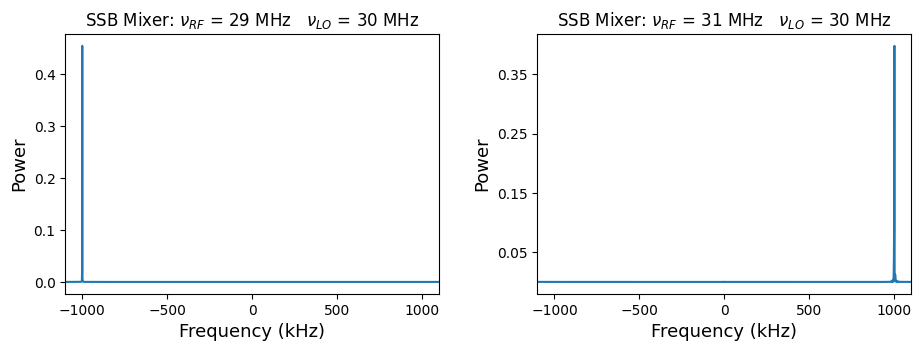

In [242]:
ssb_diff = np.load("SSB_29_30.npz")['data'][0]
ssb_sum = np.load("SSB_31_30.npz")['data'][0]

ssb_sum = ssb_sum[:,0]+1j*(ssb_sum[:,1]) 
ssb_diff = ssb_diff[:,0]+1j*(ssb_diff[:,1]) 

fft_sum = np.fft.fft(ssb_sum)
fft_diff = np.fft.fft(ssb_diff)

power_sum = np.abs(fft_sum)**2
power_diff = np.abs(fft_diff)**2

freq = np.fft.fftfreq(fft_sum.size, d=1/float(sampling_rate))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=4)

ax2.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_sum) / 1e10)
ax2.set_title(r"SSB Mixer: $\nu_{RF}$ = 31 MHz   $\nu_{LO}$ = 30 MHz")
ax2.set_xlabel("Frequency (kHz)", fontsize=13)
ax2.set_ylabel("Power", fontsize=13)
ax2.set_yticks([0.05, 0.15, 0.25, 0.35])
ax2.set_xlim(-1100, 1100)

ax1.plot(np.fft.fftshift(freq) / 1e3, np.fft.fftshift(power_diff) / 1e11)
ax1.set_title(r"SSB Mixer: $\nu_{RF}$ = 29 MHz   $\nu_{LO}$ = 30 MHz")
ax1.set_xlabel("Frequency (kHz)", fontsize=13)
ax1.set_ylabel("Power", fontsize=13)
ax1.set_xlim(-1100, 1100)